In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.3/709.3 kB 9.1 MB/s eta 0:00:00


In [2]:
!pwd

/content


In [3]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%cd /content/drive/MyDrive/data

/content/drive/MyDrive/data


In [8]:
!ls

data.yaml  train  val


In [22]:
%cd /content/drive/MyDrive/data

!yolo task=detect mode=train model=yolov8m.pt data= /content/drive/MyDrive/data/data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/data
Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/data/data.yaml, epochs=25, time=None, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

In [23]:
!ls runs/detect/train5/

args.yaml					     R_curve.png	 val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	 val_batch0_pred.jpg
confusion_matrix.png				     results.png	 val_batch1_labels.jpg
events.out.tfevents.1707207157.389bc22f38d1.12014.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					     train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					     train_batch840.jpg  weights
P_curve.png					     train_batch841.jpg
PR_curve.png					     train_batch842.jpg


In [24]:
!yolo task=detect mode=val model=/content/drive/MyDrive/data/runs/detect/train5/weights/best.pt data=data.yaml

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/data/val/labels.cache... 85 images, 0 backgrounds, 0 corrupt: 100% 85/85 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:04<00:00,  1.21it/s]
                   all         85        129      0.907      0.836      0.934      0.674
       medicine-bottle         85          4      0.868       0.75      0.912      0.567
          medicine-box         85         45      0.947      0.911      0.982      0.785
       medicine-tablet         85         80      0.906      0.846       0.91      0.669
Speed: 1.1ms preprocess, 12.6ms inference, 0.0ms loss, 16.5ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


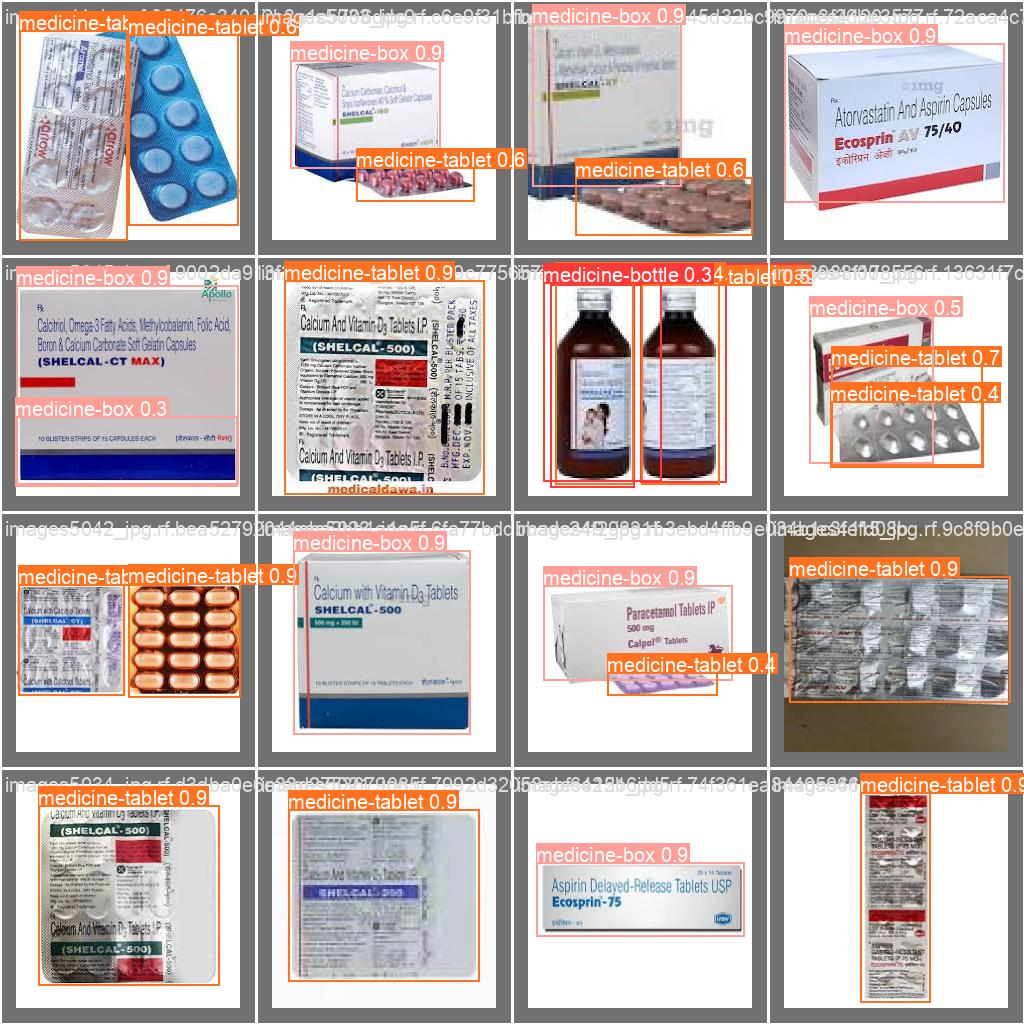

In [25]:
Image(filename='/content/drive/MyDrive/data/runs/detect/train5/val_batch0_pred.jpg', width=600)

In [28]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/data/runs/detect/train5/weights/best.pt conf=0.25 source=/content/img2.jpg save=True show_boxes=True

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/img2.jpg: 160x224 1 medicine-box, 4 medicine-tablets, 115.0ms
Speed: 1.0ms preprocess, 115.0ms inference, 579.2ms postprocess per image at shape (1, 3, 160, 224)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [27]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/data/runs/detect/train5/weights/best.pt conf=0.25 source=/content/img.png save=True show_boxes=True

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/img.png: 192x224 4 medicine-tablets, 109.3ms
Speed: 1.0ms preprocess, 109.3ms inference, 582.9ms postprocess per image at shape (1, 3, 192, 224)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/ipd2/runs/detect/train3/weights/best.pt conf=0.25 source=/content/night.jpg save=True show_boxes=True

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients, 28.5 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/night.jpg: 224x192 1 Auto, 1 Rikshaw, 163.2ms
Speed: 1.2ms preprocess, 163.2ms inference, 630.0ms postprocess per image at shape (1, 3, 224, 192)
Results saved to runs/detect/predict8
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/ipd2/runs/detect/train3/weights/best.pt conf=0.25 source=/content/photo.jpg save=True show_boxes=True

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients, 28.5 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/photo.jpg: 224x192 1 Auto, 1 Rikshaw, 210.8ms
Speed: 1.2ms preprocess, 210.8ms inference, 806.8ms postprocess per image at shape (1, 3, 224, 192)
Results saved to runs/detect/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/ipd2/runs/detect/train3/weights/best.pt conf=0.25 source=/content/road_video.mp4 save=True show_boxes=True

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients, 28.5 GFLOPs

video 1/1 (1/70) /content/road_video.mp4: 128x224 1 Car, 2 Two-wheelers, 120.6ms
video 1/1 (2/70) /content/road_video.mp4: 128x224 1 Car, 2 Two-wheelers, 85.9ms
video 1/1 (3/70) /content/road_video.mp4: 128x224 1 Car, 1 Person, 2 Two-wheelers, 59.3ms
video 1/1 (4/70) /content/road_video.mp4: 128x224 1 Car, 1 Person, 2 Two-wheelers, 59.4ms
video 1/1 (5/70) /content/road_video.mp4: 128x224 1 Car, 1 Two-wheeler, 63.8ms
video 1/1 (6/70) /content/road_video.mp4: 128x224 1 Car, 1 Person, 1 Two-wheeler, 59.5ms
video 1/1 (7/70) /content/road_video.mp4: 128x224 1 Car, 1 Person, 3 Two-wheelers, 61.9ms
video 1/1 (8/70) /content/road_video.mp4: 128x224 1 Car, 1 Person, 3 Two-wheelers, 61.3ms
video 1/1 (9/70) /content/road_video.mp4: 128x224 1 Car, 1 Person, 3 Two-wheelers, 61.6ms
video 1/1 (10/70) /content/road_video.mp4: 128x224 1 C

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/ipd2/runs/detect/train3/weights/best.pt conf=0.25 source=/content/videostreet.mp4 save=True show_boxes=True

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients, 28.5 GFLOPs

video 1/1 (1/164) /content/videostreet.mp4: 224x128 1 Car, 112.5ms
video 1/1 (2/164) /content/videostreet.mp4: 224x128 1 Car, 7.4ms
video 1/1 (3/164) /content/videostreet.mp4: 224x128 1 Car, 8.6ms
video 1/1 (4/164) /content/videostreet.mp4: 224x128 1 Car, 8.8ms
video 1/1 (5/164) /content/videostreet.mp4: 224x128 1 Car, 9.5ms
video 1/1 (6/164) /content/videostreet.mp4: 224x128 1 Car, 8.2ms
video 1/1 (7/164) /content/videostreet.mp4: 224x128 1 Car, 6.9ms
video 1/1 (8/164) /content/videostreet.mp4: 224x128 1 Car, 7.0ms
video 1/1 (9/164) /content/videostreet.mp4: 224x128 1 Car, 7.5ms
video 1/1 (10/164) /content/videostreet.mp4: 224x128 1 Car, 7.0ms
video 1/1 (11/164) /content/videostreet.mp4: 224x128 1 Car, 7.0ms
video 1/1 (12/164) /content/videostreet.mp4: 224x128 1 Car, 7.0ms
video 1/1 (13/164) /content/videostreet.mp4: 

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/ipd2/runs/detect/train3/weights/best.pt conf=0.25 source=/content/1111668431-preview.mp4 save=True show_boxes=True

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients, 28.5 GFLOPs

video 1/1 (1/327) /content/1111668431-preview.mp4: 128x224 3 Persons, 5 Two-wheelers, 110.2ms
video 1/1 (2/327) /content/1111668431-preview.mp4: 128x224 2 Persons, 5 Two-wheelers, 7.6ms
video 1/1 (3/327) /content/1111668431-preview.mp4: 128x224 1 Auto, 1 Person, 2 Two-wheelers, 7.6ms
video 1/1 (4/327) /content/1111668431-preview.mp4: 128x224 1 Auto, 1 Person, 3 Two-wheelers, 7.6ms
video 1/1 (5/327) /content/1111668431-preview.mp4: 128x224 1 Person, 3 Two-wheelers, 9.0ms
video 1/1 (6/327) /content/1111668431-preview.mp4: 128x224 1 Auto, 1 Person, 4 Two-wheelers, 7.5ms
video 1/1 (7/327) /content/1111668431-preview.mp4: 128x224 2 Persons, 5 Two-wheelers, 8.9ms
video 1/1 (8/327) /content/1111668431-preview.mp4: 128x224 1 Auto, 1 Person, 2 Two-wheelers, 7.5ms
video 1/1 (9/327) /content/1111668431-preview.mp4: 128x224 1 Auto

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/ipd2/runs/detect/train3/weights/best.pt conf=0.25 source=/content/anusshka.mp4 save=True show_boxes=True

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients, 28.5 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/71) /content/anusshka.mp4: 224x128 3 Persons, 182.1ms
video 1/1 (2/71) /content/anusshka.mp4: 224x128 2 Persons, 7.8ms
video 1/1 (3/71) /content/anusshka.mp4: 224x128 2 Persons, 7.3ms
video 1/1 (4/71) /content/anusshka.mp4: 224x128 2 Persons, 7.3ms
video 1/1 (5/71) /content/anusshka.mp4: 224x128 2 Persons, 12.7ms
video 1/1 (6/71) /content/anusshka.mp4: 224x128 2 Persons, 7.5ms
video 1/1 (7/71) /content/anusshka.mp4: 224x128 2 Persons, 7.3ms
video 1/1 (8/71) /content/anusshka.mp4: 224x128 2 Persons, 11.4ms
video 1/1 (9/71) /content/anusshka.mp4: 224x128 2 Persons, 7.3ms
video 1/1 (10/71) /content/anusshka.mp4: 224x128 2 Persons, 7.0ms
video 1/1 (11/71) /content/anusshka.mp4: 224x128 2 Persons, 7.1ms
video 1/1 (12/71) /content/anusshka.mp4: 224x128 2 Persons, 7.1ms
v

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/ipd2/runs/detect/train3/weights/best.pt conf=0.25 source=/content/1007373787-preview.mp4 save=True show_boxes=True

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients, 28.5 GFLOPs

video 1/1 (1/421) /content/1007373787-preview.mp4: 128x224 1 Person, 106.1ms
video 1/1 (2/421) /content/1007373787-preview.mp4: 128x224 1 Person, 7.2ms
video 1/1 (3/421) /content/1007373787-preview.mp4: 128x224 1 Person, 7.3ms
video 1/1 (4/421) /content/1007373787-preview.mp4: 128x224 1 Person, 7.2ms
video 1/1 (5/421) /content/1007373787-preview.mp4: 128x224 1 Auto, 1 Person, 6.9ms
video 1/1 (6/421) /content/1007373787-preview.mp4: 128x224 1 Person, 7.0ms
video 1/1 (7/421) /content/1007373787-preview.mp4: 128x224 1 Person, 6.8ms
video 1/1 (8/421) /content/1007373787-preview.mp4: 128x224 1 Person, 7.6ms
video 1/1 (9/421) /content/1007373787-preview.mp4: 128x224 1 Person, 7.5ms
video 1/1 (10/421) /content/1007373787-preview.mp4: 128x224 1 Person, 6.8ms
video 1/1 (11/421) /content/1007373787-preview.mp4: 128x224 2 Persons

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/ipd2/runs/detect/train3/weights/best.pt conf=0.25 source=/content/1070651107-preview.mp4 save=True show_boxes=True

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients, 28.5 GFLOPs

video 1/1 (1/988) /content/1070651107-preview.mp4: 128x224 1 Auto, 3 Persons, 108.5ms
video 1/1 (2/988) /content/1070651107-preview.mp4: 128x224 1 Auto, 4 Persons, 1 Two-wheeler, 7.4ms
video 1/1 (3/988) /content/1070651107-preview.mp4: 128x224 1 Auto, 4 Persons, 1 Two-wheeler, 7.0ms
video 1/1 (4/988) /content/1070651107-preview.mp4: 128x224 1 Auto, 6 Persons, 1 Two-wheeler, 9.0ms
video 1/1 (5/988) /content/1070651107-preview.mp4: 128x224 1 Auto, 6 Persons, 1 Two-wheeler, 7.0ms
video 1/1 (6/988) /content/1070651107-preview.mp4: 128x224 1 Auto, 9 Persons, 1 Two-wheeler, 6.7ms
video 1/1 (7/988) /content/1070651107-preview.mp4: 128x224 1 Auto, 7 Persons, 1 Two-wheeler, 6.8ms
video 1/1 (8/988) /content/1070651107-preview.mp4: 128x224 1 Auto, 7 Persons, 1 Two-wheeler, 6.7ms
video 1/1 (9/988) /content/1070651107-preview.mp4: 

In [ ]:
model = YOLO('/content/drive/MyDrive/ipd2/runs/detect/train3/weights/best.pt')

# Define path to video file
source = '/content/road_video.mp4'

# Run inference on the source
results = model(source, stream=True)  # generator of Results objects

# View results
for r in results:
    print(r.boxes)  # print the Boxes object containing the detection bounding boxes


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 8., 8.])
conf: tensor([0.7531, 0.4954, 0.4284])
data: tensor([[4.5487e+02, 2.4643e+02, 6.6257e+02, 4.2199e+02, 7.5314e-01, 3.0000e+00],
        [2.3707e+00, 2.5338e+02, 1.4758e+02, 4.3015e+02, 4.9539e-01, 8.0000e+00],
        [1.9477e+00, 2.6147e+02, 2.0364e+02, 4.3158e+02, 4.2840e-01, 8.0000e+00]])
id: None
is_track: False
orig_shape: (480, 852)
shape: torch.Size([3, 6])
xywh: tensor([[558.7176, 334.2099, 207.6977, 175.5544],
        [ 74.9740, 341.7641, 145.2066, 176.7779],
        [102.7918, 346.5272, 201.6882, 170.1054]])
xywhn: tensor([[0.6558, 0.6963, 0.2438, 0.3657],
        [0.0880, 0.7120, 0.1704, 0.3683],
        [0.1206, 0.7219, 0.2367, 0.3544]])
xyxy: tensor([[454.8687, 246.4327, 662.5665, 421.9871],
        [  2.3707, 253.3752, 147.5773, 430.1530],
        [  1.9477, 261.4745, 203.6359, 431.5799]])
xyxyn: tensor([[0.5339, 0.5134, 0.7777, 0.8791],
        [0.0028, 0.5279, 0.1732, 0.8962],
        [0

In [29]:
!pip install tensorflow==2.13.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 85.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 46.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.0
    Uninstalling google-auth-oauthlib-1.2.0:
      Successfully un

In [31]:
!yolo export model=/content/drive/MyDrive/data/runs/detect/train5/weights/best.pt format=saved_model

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/data/runs/detect/train5/weights/best.pt' with input shape (1, 3, 224, 224) BCHW and output shape(s) (1, 7, 1029) (49.6 MB)
requirements: Ultralytics requirements ['onnx', 'onnx2tf>=1.15.4,<=1.17.5', 'sng4onnx>=1.0.1', 'onnxsim>=0.4.33', 'onnx_graphsurgeon>=0.3.26', 'tflite_support', 'onnxruntime'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 108.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 332.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 208.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 206.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/6